In [17]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, adjusted_rand_score
from numpy import linalg as LA
from scipy.spatial.distance import pdist, cdist, squareform
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, cdist, squareform
from sklearn.decomposition import PCA
from functions import *


### creating the weird dataset


# Load Iris data
data = load_iris()
X = data.data
y = data.target





In [35]:
def x2p_conditional(X=np.array([]), tol=1e-20, max_tries=1000, perplexity=30.0):
    """
        Performs a binary search to get P-values in such a way that each
        conditional Gaussian has the same perplexity.
    """

    # Initialize some variables
    #print("Computing pairwise distances...")
    (n, d) = X.shape
    sum_X = np.sum(np.square(X), 1)
    D = np.add(np.add(-2 * np.dot(X, X.T), sum_X).T, sum_X)
    P = np.zeros((n, n))
    P = np.array(P, dtype=np.float128)
    beta = np.ones((n, 1))
    logU = np.log(perplexity)

    # Loop over all datapoints
    for i in range(n):

        # Print progress
        #if i % 500 == 0:
            #print("Computing P-values for point %d of %d..." % (i, n))

        # Compute the Gaussian kernel and entropy for the current precision
        betamin = -np.inf
        betamax = np.inf
        Di = D[i, np.concatenate((np.r_[0:i], np.r_[i+1:n]))]
        (H, thisP) = Hbeta(Di, beta[i])

        # Evaluate whether the perplexity is within tolerance
        Hdiff = H - logU
        tries = 0
        while np.abs(Hdiff) > tol and tries < max_tries:

            # If not, increase or decrease precision
            if Hdiff > 0:
                betamin = beta[i].copy()
                if betamax == np.inf or betamax == -np.inf:
                    beta[i] = beta[i] * 2.
                else:
                    beta[i] = (beta[i] + betamax) / 2.
            else:
                betamax = beta[i].copy()
                if betamin == np.inf or betamin == -np.inf:
                    beta[i] = beta[i] / 2.
                else:
                    beta[i] = (beta[i] + betamin) / 2.

            # Recompute the values
            (H, thisP) = Hbeta(Di, beta[i])
            Hdiff = H - logU
            tries += 1

        # Set the final row of P
        P[i, np.concatenate((np.r_[0:i], np.r_[i+1:n]))] = thisP

    # Return final P-matrix
    #print("Mean value of sigma: %f" % np.mean(np.sqrt(1 / beta)))
    #print("MIN value of sigma: %f" % np.min(np.sqrt(1 / beta)))
    #print('')
    sig = np.sqrt(1 / beta)

    for i in range(n):
        P[i,i] = 0

    #P = P + np.transpose(P)
    #P = P / np.sum(P)
    P = np.array(P, dtype=np.float64)
    print('how off were we?', Hdiff, 'tries', tries)
    return P

how off were we? [4.4408921e-16] tries 1000


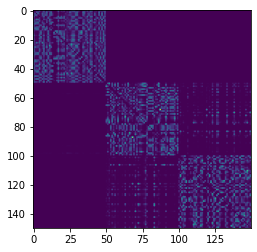

In [36]:
PP = x2p_conditional(X, tol=1e-20, max_tries=1000)

plt.imshow(PP)

(array([110.,   2.,   1.,   3.,   1.,   0.,   0.,   1.,   0.,   0.,   2.,
          1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   1.,   0.,   4.,   1.,   0.,   1.,   0.,   0.,   2.,
          0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   2.,   0.,
          0.,   4.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([0.        , 0.0006637 , 0.0013274 , 0.00199111, 0.00265481,
        0.00331851, 0.00398221, 0.00464592, 0.00530962, 0.00597332,
        0.00663702, 0.00730073, 0.00796443, 0.00862813, 0.00929183,
        0.00995553, 0.01061924, 0.01128294, 0.01194664, 0.01261034,
        0.01327405, 0.01393775, 0.01460145, 0.

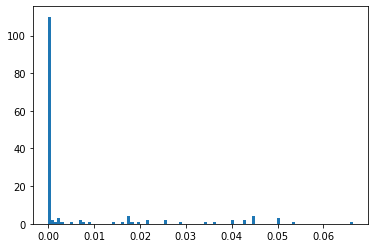

In [43]:
plt.hist(PP[2,:], bins=100)